# INVESTIGATE A DATASET - 
# BRASILIAN MEDICAL APPOINTMENTS (NO SHOW)
> **Intro**: This is an ALX-T/Udacity Data Analysis Nano Degree project on a Brasialian No-show Medical appointment dataset.
Submitted by: Temitope Olaitan - (olaitanturpe@gmail.com)

Questions asked in the investigation:

What percentage of Female missed their appointment?

What percentage of Male missed their appointment?

What is the Appointment Status grouped by Gender?

What is the percentage of people who has hypertension, diabetes, alcoholism, are handicap, has scholarship, and received sms but didn't show up for the appointment?


#### Since the dataset has been downloaded into my machine and placed into the appropriate directory, I shall go ahead to open it up in my notebook here

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Reading the file with the 'read_csv()' function
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Now I shall use a few commands to get a better understand of what the data looks like

In [3]:
# view first few rows
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
# To know the dimensions of the data
df.shape

(110527, 14)

In [5]:
# Checking out for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Getting some stats about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## A bit of explanation about the data

##### PatientId - A unique identifier for each patient
##### AppointmentID - A unique identifier for each appointment
##### Gender - A binary description of the patient's gender
##### ScheduledDay - The date the appointment was scheduled
##### AppointmentDay - The day the appointment was scheduled for
##### Age - Age of the Patient (in number of years)
##### Neighbourhood - The locale of the hospital
##### Scholarship - is the appointment was sponsored by the social welfare program of the govt? ( 1 - means 'YES' and 0 - means 'NO')
##### Hipertension - is the patient hypertensive? ( 1 - means 'YES' and 0 - means 'NO')
##### Diabetes - is the patient diabetic? ( 1 - means 'YES' and 0 - means 'NO')
##### Alcoholism - is the patient an alcoholic? ( 1 - means 'YES' and 0 - means 'NO')
##### Handcap - is the patient handicapped? ( 1 - means 'YES' and 0 - means 'NO')
##### SMS_received - Did the patient receive SMS_alert? ( 1 - means 'YES' and 0 - means 'NO')
##### No-show - The patient didn't show up? ( 'YES' means they didn't show up and NO means they showed up)

## Steps to clean the dataset

In [7]:
# From df.describe() above, I discovered that min age is '-1' (which is not a realistic number in terms of Age).
# All data set that falls into this category should be removed.

In [8]:
# Searching for data where age is less than 0

df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# we have only 1 row and it shall be dropped.

df.drop(df[(df.Age < 0)].index, inplace=True)

# '.index' will help to maintain the column index
# 'inplace' will help to make the change permanent
# Therefore we now have 110526 rows and 14 columns.

In [10]:
# checking for duplicates

df.duplicated().any().sum()

# Fortunately! there are no duplicates. Hooray!

0

In [11]:
# checking for null values

df.isnull().sum()

# Fortunately! there are no null values. Hooray!

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
# Renaming all the columns to suit my typing preference.

df.columns = ['patient_id','appointment_id','gender',
              'scheduled_day','appointment_day','age','neighbourhood',
              'scholarship','hypertension','diabetes','alcoholism',
              'handicap','sms_received','no_show']

In [13]:
# cleaning out time data from the 'appointment day' column

df[['appointment_date', 'time']]=df['appointment_day'].str.split('T', 1, expand=True)
df.head(2)

# We now have 2 extra columns.... All irrelevant columns will soon be dropped.

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_date,time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,00:00:00Z
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,00:00:00Z


In [14]:
# Converting the appointment day to DateTime datatype.

df['appointment_date']=pd.to_datetime(df['appointment_date'])
df.info()

# I won't do same to the 'Schedule day' because I deem it not so relevant to my investigations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patient_id        110526 non-null  float64       
 1   appointment_id    110526 non-null  int64         
 2   gender            110526 non-null  object        
 3   scheduled_day     110526 non-null  object        
 4   appointment_day   110526 non-null  object        
 5   age               110526 non-null  int64         
 6   neighbourhood     110526 non-null  object        
 7   scholarship       110526 non-null  int64         
 8   hypertension      110526 non-null  int64         
 9   diabetes          110526 non-null  int64         
 10  alcoholism        110526 non-null  int64         
 11  handicap          110526 non-null  int64         
 12  sms_received      110526 non-null  int64         
 13  no_show           110526 non-null  object        
 14  appo

In [15]:
# Finally, I want to drop columns 'patient_id','appointment_id' and'scheduled_day'. 
# I deem them to be irrelevant to my analysis.

# I wont be using the drop() function. Rather I will mask out the unwanted columns

df = df[['appointment_date','gender','age','neighbourhood','scholarship','hypertension',
            'diabetes','alcoholism','handicap','sms_received','no_show']]
df.head(2)

,appointment_date,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2016-04-29,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,2016-04-29,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
# Checking the shape of the dataframe

df.shape

(110526, 11)

# Investigations
##### In this investigation, my independent variable is 'no_show', which other features will be analysed upon.

### What percentage of Female missed their appointment?

###### To solve this, I will find out the number of female who didnt show (where 'no_show' is yes), and divide it by total number of female

In [17]:
# selecting all females in the data

all_F=df[df.gender=='F']
all_F.head(2)

,appointment_date,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2016-04-29,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,2016-04-29,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [18]:
# counting number of Female who didn't show (no-show==Yes)

noshowF=all_F[all_F.no_show=='Yes'].count()['no_show']
noshowF

14594

In [19]:
# counting number of female in general

count_female=df.gender.value_counts()['F']
count_female

71839

In [20]:
# converting to percentage

(noshowF/count_female)*100

20.314870752655242

#### From above we see that there are '71,839' females in the dataset, where '14,594' of them did not show up for their appointment.
#### which makes a 20.31% No-Show rate amongst the Female

### What percentage of Male missed their appointment?

In [21]:
# selecting all males in the data

all_M=df[df.gender=='M']
all_M.head(2)

,appointment_date,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
1,2016-04-29,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
11,2016-04-29,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [22]:
# counting number of male who didn't show (no-show==Yes)

noshowM=all_M[all_M.no_show=='Yes'].count()['no_show']
noshowM

7725

In [23]:
# counting number of female in general

count_male=df.gender.value_counts()['M']
count_male

38687

In [24]:
# converting to percentage

(noshowM/count_male)*100

19.967947889471915

#### From above we see that there are '38,687' males in the dataset, where '7,725' of them did not show up for their appointment.
#### which makes a 19.97% No-Show rate amongst the Male

### Visualizing Appointment Status by Gender

In [25]:
male_noshow=df.gender[(df.gender=='M')&(df.no_show=='Yes')].count()
female_noshow=df.gender[(df.gender=='F')&(df.no_show=='Yes')].count()

In [26]:
male_show=df.gender[(df.gender=='M')&(df.no_show=='No')].count()
female_show=df.gender[(df.gender=='F')&(df.no_show=='No')].count()

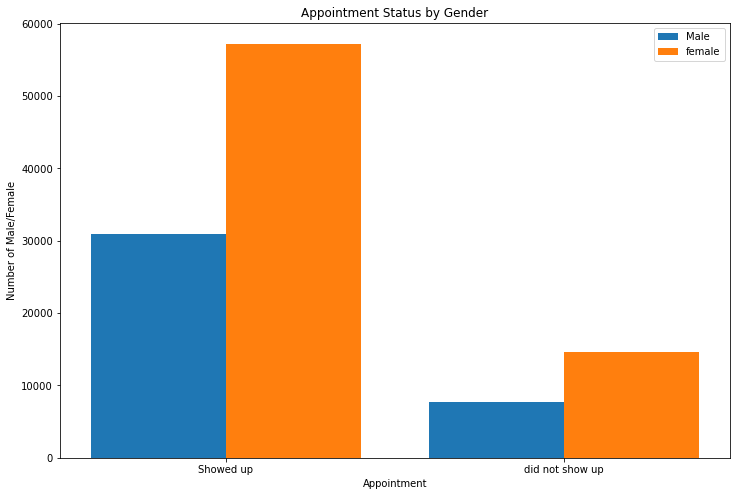

In [27]:
# setting parameters for the plot
width=0.4
my_locus=["Showed up", "did not show up"]
male=[male_show, male_noshow]
female=[female_show, female_noshow]

# Specifying where each bar should be plotted
bar1=np.arange(len(my_locus))
bar2=[i+width for i in bar1]

# Adjusting the size of the plot
plt.figure(figsize=(12,8))

# The bars to plot
plt.bar(my_locus,male,width,label='Male')
plt.bar(bar2,female,width,label='female')

# Naming the bar appropriately
plt.xlabel('Appointment')
plt.ylabel('Number of Male/Female')
plt.title('Appointment Status by Gender')
plt.xticks(bar1+width/2,my_locus)

# inititalising the legend function and showing the plot altogether
plt.legend()
plt.show()

### Visualizing percentage of the people who has hypertension, diabetes, alcoholism, handicap, scholarship, and received sms but didn't show up for the appointment

In [28]:
# number of persons who received sms and didnt show
sms=df.loc[(df.sms_received==1)&(df.no_show=='Yes')].count()['no_show']

# number of persons who received scholarship and didnt show
scholarship=df.loc[(df.scholarship==1)&(df.no_show=='Yes')].count()['no_show']

# number of persons who has hypertension and didnt show
hypertension=df.loc[(df.hypertension==1)&(df.no_show=='Yes')].count()['no_show']

# number of persons who has diabetes and didnt show
diabetes=df.loc[(df.diabetes==1)&(df.no_show=='Yes')].count()['no_show']

# number of persons who are alcoholic and didnt show
alcoholism=df.loc[(df.alcoholism==1)&(df.no_show=='Yes')].count()['no_show']

# number of persons who are handicapped and didnt show
handicap=df.loc[(df.handicap==1)&(df.no_show=='Yes')].count()['no_show']


#saving these counts as a list and naming them for the plot
observations=['sms','scholarship','hypertension','diabetes','alcoholism','handicap']
plots=[sms,scholarship,hypertension,diabetes,alcoholism,handicap]

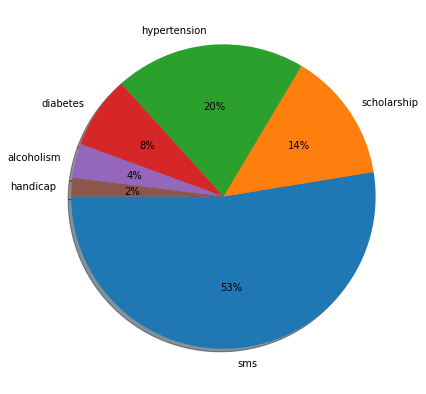

In [29]:
# adjusting figure size and showing the plot altogether
plt.figure(figsize=(7,7))
plt.pie(plots, labels=observations, autopct='%0.f%%', shadow=True, startangle=180)
plt.show()

#### From the figure above, we can deduce that more than half of those who received sms reminders still didn't show up for their appointment.
#### About 14% of people didnt show up for their appointment despite having sponsorship on their medical bills

# Limitations:

In [30]:
# 1. our dataset is limited, it doesn't capture other variable that might have contributed to the 'no show' for appointments.
# factors like - patient might be too sick to get themselves to the hospital, 
#                children and aged ones might not be responsible for bringing themselves to the hospital

# 2. Our dataset is skewed towards the female gender. Having a lot more female observation than male 
# makes all analysis done on gender skew to one side

# CONCLUSION

# In conclusion:
# Though we see that there isn't much difference in the percentage of missed appointments between Male(19.96%) and Female(20.31%),
# We realise from this visualization that we have more Female than Male who showed up for their appointment,
# as well as more Female than Male who did not show up for their appointment.

# This is in coherence with the fact that in general, there are more Female observations than Male in this dataset.


# Also from the pie chart, we realise that despite receiving sms reminders 53% of people still didn't honour their appointment